## Section 1: Business Understanding

#### Brief description and business questions

One of the components that is needed in order to forecast the effect of a campaign is the average email open rate. Since everything it’s as hard as it can be, there are many clients that doesn’t have this metric in our data bases. Therefore the object of this project is to build a linear regression model based on what’s taught in the course to try and forecast this metric for clients that doesn’t have it. The business questions needed to complete the project are:

The questions answered in notebook are the following:

    1. Which are the most relevant client’s traits and how can they be group to get a better understanding of them? 
    2. How does the open rate of emails behave in young clients, 18 to 30 years old?
    3. Is a multivariate regression model based on the variables identified an acceptable model to predict open rate?
 

#### Question 1: Which are the most relevant client’s traits and how can they be group to get a better understanding of them? 

Question number one is not code related, instead is based in my experience as a marketeer and my aproach is the following:

1. Which are the most relevant client’s traits and how can they be group to get a better understanding of them?

In this project I used different groups of features that could describe our client more holistically and extracted the data based on this approach. The groups and variables I used are the following:

Demographic: Gender, age and income.
Psychographic: transactional forecasted affinities.
Business related: savings and investments products.
Behavioral: Digital affinity, saving behavior, spending behavior and credit behavior, credit score.
Geographical: City.

Based on this the data available is the following:

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import AllTogether as t
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

## Section 2: Data understanding

In [2]:
#Loads data and assess its content 
df = pd.read_csv("df_ds.csv", sep=',')
df.head()

edad_cliente departamento_correspondencia  cr_hipotecario  dafuturo  cdt  \
0            18                 BOGOTA, D.C.               0         0    0   
1            24                          NaN               0         0    0   
2            18                          NaN               0         0    0   
3            19              VALLE DEL CAUCA               0         0    0   
4            26                 BOGOTA, D.C.               0         0    0   

   fond ingreso_2 act_laboral_general acierta_plus categoria_gasto  \
0     0    908526                 NaN           \N              \N   
1     0        \N                 NaN            1              \N   
2     0        \N                 NaN            0              \N   
3     0        \N                 NaN          733              \N   
4     0   1149212            EMPLEADO          150              \N   

  categoria_ahorro categoria_credito  madurez_financiera  open_rate quanto  \
0               \N                \N                   0        NaN     \N   
1               \N                \N                   0        NaN   1135   
2               \N                \N                   0        NaN   1299   
3               \N                \N                   0        NaN   1281   
4               \N                \N                   0        NaN   1853   

  con_gusto_agrupado con_digital_d  
0    sin_informacion    No_digital  
1    sin_informacion    No_digital  
2    sin_informacion    No_digital  
3    sin_informacion    No_digital  
4    sin_informacion    No_digital

In [3]:
#looks at different types of data contained
df.dtypes

edad_cliente                      int64
departamento_correspondencia     object
cr_hipotecario                    int64
dafuturo                          int64
cdt                               int64
fond                              int64
ingreso_2                        object
act_laboral_general              object
acierta_plus                     object
categoria_gasto                  object
categoria_ahorro                 object
categoria_credito                object
madurez_financiera                int64
open_rate                       float64
quanto                           object
con_gusto_agrupado               object
con_digital_d                    object
dtype: object

In [4]:
#Check the dimensions of the data set
df.shape

(20000, 17)

In [5]:
#Full data describe, here I can check for missing and data patterns with a single table
df.describe(include='all').T.reset_index()

index    count unique              top   freq  \
0                   edad_cliente  20000.0    NaN              NaN    NaN   
1   departamento_correspondencia    12609     36     BOGOTA, D.C.   2991   
2                 cr_hipotecario  20000.0    NaN              NaN    NaN   
3                       dafuturo  20000.0    NaN              NaN    NaN   
4                            cdt  20000.0    NaN              NaN    NaN   
5                           fond  20000.0    NaN              NaN    NaN   
6                      ingreso_2    20000   3935               \N  12164   
7            act_laboral_general     7674      8         EMPLEADO   5593   
8                   acierta_plus    20000    734                0   3510   
9                categoria_gasto    19342      4               \N  16804   
10              categoria_ahorro    19448      4               \N  16804   
11             categoria_credito    18402      4               \N  16804   
12            madurez_financiera  20000.0    NaN              NaN    NaN   
13                     open_rate   7471.0    NaN              NaN    NaN   
14                        quanto    20000    571             1244    939   
15            con_gusto_agrupado    19191     12  sin_informacion  18297   
16                 con_digital_d    19987      2       No_digital  16545   

        mean       std   min   25%   50%   75%   max  
0    24.9992  3.429488  18.0  22.0  25.0  28.0  30.0  
1        NaN       NaN   NaN   NaN   NaN   NaN   NaN  
2     0.0059  0.076586   0.0   0.0   0.0   0.0   1.0  
3     0.0029  0.053775   0.0   0.0   0.0   0.0   1.0  
4     0.0019  0.043549   0.0   0.0   0.0   0.0   1.0  
5     0.0073   0.08513   0.0   0.0   0.0   0.0   1.0  
6        NaN       NaN   NaN   NaN   NaN   NaN   NaN  
7        NaN       NaN   NaN   NaN   NaN   NaN   NaN  
8        NaN       NaN   NaN   NaN   NaN   NaN   NaN  
9        NaN       NaN   NaN   NaN   NaN   NaN   NaN  
10       NaN       NaN   NaN   NaN   NaN   NaN   NaN  
11       NaN       NaN   NaN   NaN   NaN   NaN   NaN  
12    0.2234  0.416535   0.0   0.0   0.0   0.0   1.0  
13  0.089862  0.181244   0.0   0.0  0.01  0.09   1.0  
14       NaN       NaN   NaN   NaN   NaN   NaN   NaN  
15       NaN       NaN   NaN   NaN   NaN   NaN   NaN  
16       NaN       NaN   NaN   NaN   NaN   NaN   NaN

There are some strange characters "\N" that should be removed. Also for categorical values its important to remove NAs and turn them into a specific text in order to use them as dummy variables.

## Section 3: Data prepare

Cleaning functions

In [11]:
# Remove "N"s characters from all features. Input (df)
def remove_blanks(df):
    r"""
    Remove string "\N" from all columns in a dataframe.
  
    Parameters:
    df: Any pandas dataframe
  
    Returns:
    df: the same dataframe with "\Ns removed"
    """
    df.fillna(np.nan,inplace=True)
    df = df.applymap(lambda col: np.nan if col == "\\N" else col)
    return df

#def nans_to_mode(df):


In [12]:
df = remove_blanks(df)

In [15]:
# Fix nans of categorical values, replace them with "sin_informacion". 
# This is necesary in order to be able to turn missing information into a dummy
# variable which I suspect could have a great relation with the open rate.
df["categoria_gasto"].fillna("sin_informacion", inplace=True)
df["categoria_ahorro"].fillna("sin_informacion", inplace=True)
df["categoria_credito"].fillna("sin_informacion", inplace=True)
df["act_laboral_general"].fillna("sin_informacion", inplace=True)
df["departamento_correspondencia"].fillna("sin_informacion", inplace=True)
df["con_gusto_agrupado"].fillna("sin_informacion", inplace=True)
df["con_digital_d"].fillna("sin_informacion", inplace=True)

In [16]:
# Fix numerical columns, nans need to be filled with mode is the best statistic to describe left skewed with posible outliers data.
df['ingreso_2'].fillna(int(df['ingreso_2'].mode()), inplace=True)
df['acierta_plus'].fillna(int(df['acierta_plus'].mode()), inplace=True)
df['quanto'].fillna(int(df['quanto'].mode()), inplace=True)

# Change these column types to float, because of the text it was stored as a string
df['acierta_plus'] = df['acierta_plus'].astype(str).astype(float)
df['ingreso_2'] = df['ingreso_2'].astype(str).astype(float)
df['quanto'] = df['quanto'].astype(str).astype(float)

In [17]:
# Categorical values to dummies in order to use each categorical data as a factor of the model. 
cat_vars = df.select_dtypes(include=['object']).copy().columns

for var in cat_vars:
    df = pd.concat([df.drop(var, axis=1),
                    pd.get_dummies(df[var],
                                   prefix=var,
                                   prefix_sep='_',
                                   drop_first=True)], axis=1)
del cat_vars, var

In [18]:
# Check for success in dummy variables
df.dtypes

edad_cliente                          int64
cr_hipotecario                        int64
dafuturo                              int64
cdt                                   int64
fond                                  int64
                                      ...  
con_gusto_agrupado_Tecnologia         uint8
con_gusto_agrupado_Viajes             uint8
con_gusto_agrupado_sin_informacion    uint8
con_digital_d_No_digital              uint8
con_digital_d_sin_informacion         uint8
Length: 76, dtype: object

In [19]:
# Evaluating that all columns have their missing values filled.
df.describe(include='all').T

count      mean       std   min   25%  \
edad_cliente                        20000.0  24.99920  3.429488  18.0  22.0   
cr_hipotecario                      20000.0   0.00590  0.076586   0.0   0.0   
dafuturo                            20000.0   0.00290  0.053775   0.0   0.0   
cdt                                 20000.0   0.00190  0.043549   0.0   0.0   
fond                                20000.0   0.00730  0.085130   0.0   0.0   
...                                     ...       ...       ...   ...   ...   
con_gusto_agrupado_Tecnologia       20000.0   0.00010  0.010000   0.0   0.0   
con_gusto_agrupado_Viajes           20000.0   0.00220  0.046854   0.0   0.0   
con_gusto_agrupado_sin_informacion  20000.0   0.95530  0.206650   0.0   1.0   
con_digital_d_No_digital            20000.0   0.82725  0.378040   0.0   1.0   
con_digital_d_sin_informacion       20000.0   0.00065  0.025487   0.0   0.0   

                                     50%   75%   max  
edad_cliente                        25.0  28.0  30.0  
cr_hipotecario                       0.0   0.0   1.0  
dafuturo                             0.0   0.0   1.0  
cdt                                  0.0   0.0   1.0  
fond                                 0.0   0.0   1.0  
...                                  ...   ...   ...  
con_gusto_agrupado_Tecnologia        0.0   0.0   1.0  
con_gusto_agrupado_Viajes            0.0   0.0   1.0  
con_gusto_agrupado_sin_informacion   1.0   1.0   1.0  
con_digital_d_No_digital             1.0   1.0   1.0  
con_digital_d_sin_informacion        0.0   0.0   1.0  

[76 rows x 8 columns]

##  Section 4: Evaluation

#### Question 2: How does the open rate of emails behave in young clients, 18 to 30 years old?

A great way of describing and visualizating data is through histograms, for open rates the results are the following:

<AxesSubplot:>

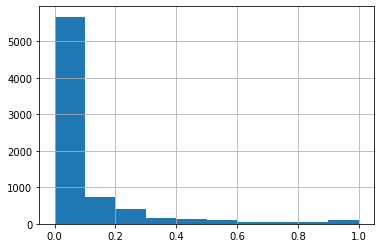

In [20]:
#Graph histogram
df.open_rate.hist()

Descriptive statistics are also great for analyzing this feature.

In [22]:
# Descritive statistics formula used on open rate variable
df.open_rate.describe(include='all').T.reset_index()

index    open_rate
0  count  7471.000000
1   mean     0.089862
2    std     0.181244
3    min     0.000000
4    25%     0.000000
5    50%     0.010000
6    75%     0.090000
7    max     1.000000

This visualitations allow me to understand that open_rate distribution is skewed to the left and from the descriptive statistics we are able to udnerstand its mean is 9% but it has significant standard deviation of 18%

#### 3. Is a multivariate regression model based on the variables identified an acceptable model to predict open rate?

In order to answer the business question, I will make a multivariate regresion.To prove its efficiency I'll split the data set in a training set and a test set. Then I'll check the results by using the r^2 and if its necesary I'll try to optimze the features selection.

In [23]:
# Filter for model set
df = df.dropna(subset=['open_rate'], axis=0)

In [24]:
#Split data in the dependent and independent variables
y = df['open_rate']
x = df.drop(['open_rate'], 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
#Split data into training set and test set and initiate de lm_model using the LinearRegression function.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True) 
lm_model.fit(x_train, y_train)
#Try the model in the test set
y_test_preds = lm_model.predict(x_test)

##### Evaluate

In [26]:
#Calculate the r^2 of the test set.
"r-squared score was {} on {} values.".format(r2_score(y_test,y_test_preds),len(y_test))

'r-squared score was 0.011686980776914546 on 2242 values.'

##### Re model and evaluation

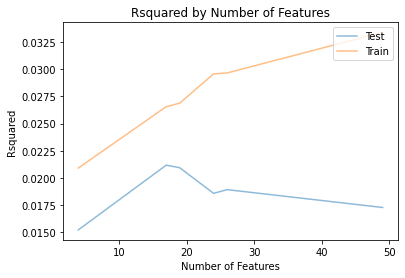

17
0.021169683116173954
0.02655591990745887


In [27]:
# Model optimization using a technique that make diferent regresions with diferent cutoffs
cutoffs = [10000, 50000, 35000, 25000, 10000, 1000, 500, 300, 250, 50]

r2_scores_test, r2_scores_train, lm_model, x_train, x_test, y_train, y_test = t.find_optimal_lm_mod(x, y, cutoffs)

print(x_train.shape[1])  # Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)])  # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)])  # The model we should implement train_r2


The r^2 is too low to use this model in production, it's recomended to look for other models in order to get a better fit. Which is the conclusion of this project, random forest is a suggestion that should be evaluated.